In [1]:
import pandas as pd
import os
import chardet # para detectar o tipo de codificação que a base de dados usa 

def detectar_codificacao(baseDados):
    with open(baseDados, 'rb') as file:
        data = file.read()
    resultado = chardet.detect(data)
    return resultado['encoding']




In [2]:

#importando os arquivos
caminho_padrao = r'C:\Users\savio.sousa\Documents\GitHub\INTEGRAPB'
vendas_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Vendas - 2017.csv'), sep=';', encoding=detectar_codificacao('Contoso - Vendas - 2017.csv'))


In [3]:
produtos_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Cadastro Produtos.csv'), sep=';', encoding=detectar_codificacao('Contoso - Cadastro Produtos.csv'))
lojas_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Lojas.csv'), sep=';', encoding=detectar_codificacao('Contoso - Lojas.csv'))
clientes_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Clientes.csv'), sep=';', encoding=detectar_codificacao('Contoso - Clientes.csv'))


In [4]:
# renomeando colunas com nomes errados pela codificação

clientes_df.rename(columns={
    'ÿID Cliente': 'ID Cliente',
}, inplace=True)

produtos_df.rename(columns={
    'ÿNome da Marca': 'Nome da Marca',
}, inplace=True)

lojas_df.rename(columns={
    'ÿID Loja':'ID Loja'
}, inplace=True)




In [5]:
#filtrando colunas de cada base de dados
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Nome da Marca']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]



#mesclando as informações no dataframe vendas_df ID PRODUTO/ ID LOJA/ ID CLIENTE E EMAIL
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente').rename(columns={'E-mail': 'E-mail do Cliente'})


In [6]:
import pandas as pd
import os
import chardet  # para detectar o tipo de codificação que a base de dados usa

def detectar_codificacao(baseDados):
    with open(baseDados, 'rb') as file:
        data = file.read()
    resultado = chardet.detect(data)
    return resultado['encoding']

# Importando os arquivos
caminho_padrao = r'C:\Users\savio.sousa\Documents\GitHub\IntegraPB'
vendas_df = pd.read_csv(os.path.join(caminho_padrao, 'Contoso - Vendas - 2017.csv'), sep=';', encoding=detectar_codificacao(os.path.join(caminho_padrao, 'Contoso - Vendas - 2017.csv')))
produtos_df = pd.read_csv(os.path.join(caminho_padrao, 'Contoso - Cadastro Produtos.csv'), sep=';', encoding=detectar_codificacao(os.path.join(caminho_padrao, 'Contoso - Cadastro Produtos.csv')))
lojas_df = pd.read_csv(os.path.join(caminho_padrao, 'Contoso - Lojas.csv'), sep=';', encoding=detectar_codificacao(os.path.join(caminho_padrao, 'Contoso - Lojas.csv')))
clientes_df = pd.read_csv(os.path.join(caminho_padrao, 'Contoso - Clientes.csv'), sep=';', encoding=detectar_codificacao(os.path.join(caminho_padrao, 'Contoso - Clientes.csv')))

# Corrigindo nomes de colunas
clientes_df.rename(columns={'ÿID Cliente': 'ID Cliente'}, inplace=True)
produtos_df.rename(columns={'ÿNome da Marca': 'Nome da Marca'}, inplace=True)
lojas_df.rename(columns={'ÿID Loja': 'ID Loja'}, inplace=True)

# Filtrando colunas de cada base de dados
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Nome da Marca']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]

# Mesclando as informações no dataframe vendas_df ID PRODUTO/ ID LOJA/ ID CLIENTE E EMAIL
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente').rename(columns={'E-mail': 'E-mail do Cliente'})

# O DataFrame vendas_df está pronto para ser usado no Power BI

In [7]:
dataset = vendas_df
tres_lojasdf = dataset[dataset['ID Loja'].isin([86, 306, 172])]

In [8]:
#célula de display

display(tres_lojasdf)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome da Marca,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Adventure Works,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
16,372597,21/05/2017,22/05/2017,1,86,981,1,21344,10,0,A. Datum,Loja Contoso Austin,makayla3@adventure-works.com
17,614980,18/08/2017,18/08/2017,0,306,1621,9,21344,4,0,Contoso,Loja Contoso Europe Online,makayla3@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
970132,426980,08/06/2017,11/06/2017,3,172,1287,1,559,5,0,Contoso,Loja Contoso Hartford,pkiddefi@globo.com
970135,688563,17/09/2017,23/09/2017,6,172,1236,3,13331,6,0,Fabrikam,Loja Contoso Hartford,dsibbert98@senate.gov
970163,778999,18/10/2017,19/10/2017,1,172,1243,1,3459,5,0,Fabrikam,Loja Contoso Hartford,mpaddickcs@paypal.com
970169,815707,30/10/2017,02/11/2017,3,172,937,1,341,10,0,Southridge Video,Loja Contoso Hartford,mpadfield9g@usnews.com


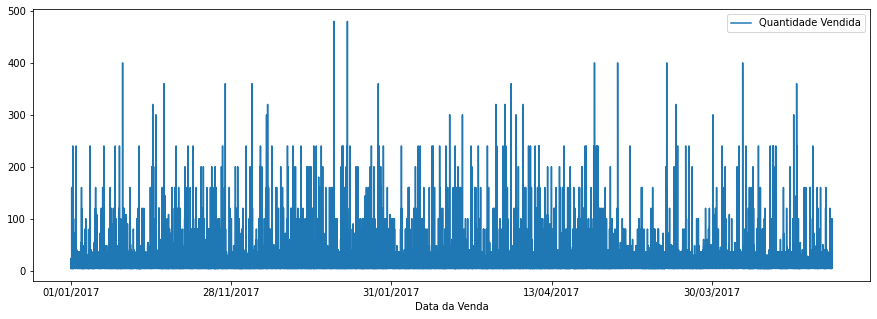

In [10]:
import matplotlib.pyplot as plt

tres_lojasdf.plot(x='Data da Venda', y='Quantidade Vendida', figsize=(15, 5))
plt.show()